In [1]:
import numpy as np
import matplotlib.pyplot as plt
#整理自唐宇迪深度学习课程，推荐大家看，很适合入门。

In [2]:
def generatedata(N,D,K):
    X=np.zeros((N*K,D))
    y=np.zeros(N*K,dtype='uint8') #颜色,也代表类别（不同的颜色是不同的类别）
    for j in range(K):
        ix=range(N*j,N*(j+1))
        r=np.linspace(0.0,1,N)
        t=np.linspace(j*4,(j+1)*4,N)+np.random.randn(N)*0.2
        X[ix]=np.c_[r*np.sin(t),r*np.cos(t)] #np.c_按colunm来组合array
        y[ix]=j
    fig=plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral) #c=y.cmap是颜色设置，s=40是点的大小
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.show()
    return X,y

In [3]:
#线性分类，没有激活函数的单层神经网络
def softmax(w,b,X):
    num_examples=X.shape[0]  #样本数
    stepsize=1  #学习率
    reg=1e-3     #正则化
    for i in range(100):
        scores=np.dot(X,w)+b
        exp_score=np.exp(scores)   #分成三类，选择softmax分类器
        probs=exp_score/np.sum(exp_score,axis=1,keepdims=True)
        correct_logprob=-np.log(probs[range(num_examples),y])  #单个类别损失函数.这个命令取得行数和列数。range(num_examples)是行数，y是label
        data_loss=np.sum(correct_logprob)/num_examples  #data loss
        reg_loss=0.5*reg*np.sum(w*w)
        loss=data_loss+reg_loss                     #前向传播完成
        if i%10==0:
            print 'iteration %d:loss %f'%(i,loss)
    
        dscores=probs                              #反向传播。softmax梯度传递，首先是score的梯度
        dscores[range(num_examples),y]-=1          #概率值减去1
        dscores/=num_examples                      #loss值对score值求导，第一步传播的梯度。而下一步的梯度等于上一步的梯度乘以自身梯度
    
        dw=np.dot(X.T,dscores)                     #w本身的梯度是x,本身梯度乘以上一步传下来的梯度
        db=np.sum(dscores,axis=0,keepdims=True)    #b本身的梯度是1,keepdims=True的意思是sum之后保持现在的维度不变
        dw+=reg*w                                  #正则化项的梯度
    
        w+=-stepsize*dw
        b+=-stepsize*db
        
    return w,b

In [4]:
def scores_softmax(w,b,X,y):
    scores=np.dot(X,w)+b
    predicted_class=np.argmax(scores,axis=1)
    accuracy=np.mean(predicted_class==y)
    print(accuracy)
    return accuracy

In [5]:
def Relu(h,w,b,w2,b2,X,y):
    num_examples=X.shape[0]
    stepsize=1  #学习率
    reg=1e-4     #正则化
    for i in range(2000):
        hidden_layer=np.maximum(0,np.dot(X,w)+b)   #得分函数与激活函数
        scores=np.dot(hidden_layer,w2)+b2
    
        exp_scores=np.exp(scores)
        probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    
        correct_lossprobs=-np.log(probs[range(num_examples),y])
        data_loss=np.sum(correct_lossprobs)/num_examples
        reg_loss=0.5*np.sum(w*w)+0.5*np.sum(w2*w2)
        loss=data_loss+reg_loss
        if i%10==0:
            print 'iteration %d:loss %f'%(i,loss)
    
        dscores=probs                              #反向传播。softmax梯度传递，首先是score的梯度
        dscores[range(num_examples),y]-=1          #概率值减去1
        dscores/=num_examples                      #loss值对score值求导，第一步传播的梯度。而下一步的梯度等于上一步的梯度乘以自身梯度
    
        dw2=np.dot(hidden_layer.T,dscores)           #w2自身的梯度等于hidden_layer,传下来的梯度是dscores
        db2=np.sum(dscores,axis=0,keepdims=True)
    
        dhidden=np.dot(dscores,w2.T)              #隐藏层的梯度
        dhidden[hidden_layer<=0]=0
    
        dw=np.dot(X.T,dhidden)
        db=np.sum(dhidden,axis=0,keepdims=True)
    
        dw2+=reg*w2
        dw+=reg*w
    
        w+=-stepsize*dw
        w2+=-stepsize*dw2
        b+=-stepsize*db
        b2+=-stepsize*db2
    return w,w2,b,b2

In [6]:
def accuracy_relu(X,w,w2,b,b2,y):
    hidden_layer = np.maximum(0,np.dot(X,w)+b)
    scores = np.dot(hidden_layer,w2) + b2
    predicted_class = np.argmax(scores,axis = 1)
    accuracy=np.mean(predicted_class == y)
    print(accuracy)

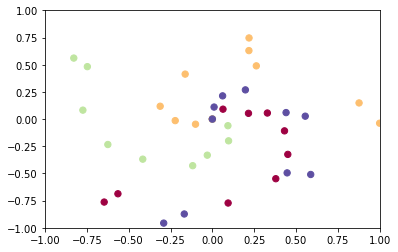

In [7]:
N=10 #number of points per class
D=2 #dimensionality
K=4  #number of class
X,y=generatedata(N,D,K)

In [8]:
w=np.random.randn(D,K)
b=np.zeros((1,K))
w,b=softmax(w,b,X)
accuracy=scores_softmax(w,b,X,y)

iteration 0:loss 1.620397
iteration 10:loss 1.344461
iteration 20:loss 1.222953
iteration 30:loss 1.163028
iteration 40:loss 1.131601
iteration 50:loss 1.113784
iteration 60:loss 1.102979
iteration 70:loss 1.096068
iteration 80:loss 1.091457
iteration 90:loss 1.088277
0.35


In [9]:
h=100
w=0.01*np.random.randn(D,h)
b=np.zeros((1,h))
w2=0.01*np.random.randn(h,K)
b2=np.zeros((1,K))
w,w2,b,b2=Relu(h,w,b,w2,b2,X,y)
accuracy=accuracy_relu(X,w,w2,b,b2,y)

iteration 0:loss 1.415599
iteration 10:loss 1.427617
iteration 20:loss 1.513439
iteration 30:loss 1.934565
iteration 40:loss 3.437277
iteration 50:loss 5.998364
iteration 60:loss 8.095015
iteration 70:loss 9.409778
iteration 80:loss 10.345701
iteration 90:loss 11.137802
iteration 100:loss 11.896067
iteration 110:loss 12.668641
iteration 120:loss 13.470132
iteration 130:loss 14.332169
iteration 140:loss 15.296146
iteration 150:loss 16.219716
iteration 160:loss 16.877170
iteration 170:loss 17.684312
iteration 180:loss 18.522504
iteration 190:loss 19.389899
iteration 200:loss 20.305849
iteration 210:loss 21.267511
iteration 220:loss 22.271686
iteration 230:loss 23.345880
iteration 240:loss 24.476884
iteration 250:loss 25.662696
iteration 260:loss 26.926023
iteration 270:loss 27.498175
iteration 280:loss 28.633220
iteration 290:loss 29.839632
iteration 300:loss 31.386069
iteration 310:loss 33.104500
iteration 320:loss 34.839318
iteration 330:loss 36.816080
iteration 340:loss 38.941405
iter

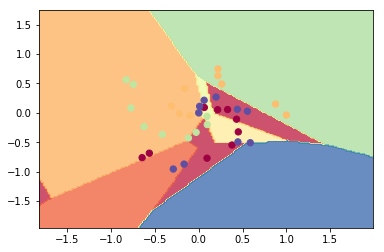

In [10]:
#画出分类效果
h=0.02
x_min , x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min , y_max = X[:,1].min() - 1, X[:,1].max() +1
xx, yy = np.meshgrid(np.arange(x_min , x_max ,h),
                     np.arange(y_min , y_max ,h))
Z = np.dot(np.c_[xx.ravel(),yy.ravel()],w) + b
Z = np.argmax(Z,axis = 1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

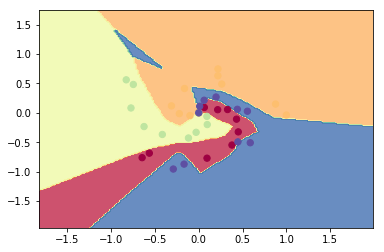

In [11]:
h=0.02
x_min , x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min , y_max = X[:,1].min() - 1, X[:,1].max() +1
xx, yy = np.meshgrid(np.arange(x_min , x_max ,h),
                     np.arange(y_min , y_max ,h))
Z = np.dot(np.maximum(0,np.dot(np.c_[xx.ravel(),yy.ravel()],w)+b),w2) + b2
Z = np.argmax(Z,axis = 1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()